In [1]:
!pip install tensorflow==2.15.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 83.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's depende

# Download Dataset

In [2]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229 (from 1)
Receiving objects: 100% (163229/163229), 2.00 GiB | 43.21 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Updating files: 100% (182401/182401), done.


In [3]:
!du -sh /kaggle/working/PlantVillage-Dataset/raw/color
!ls /kaggle/working/PlantVillage-Dataset/raw/color


923M	/kaggle/working/PlantVillage-Dataset/raw/color
 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___Powdery_mildew'
'Cherry_(including_sour)___healthy'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust_'
'Corn_(maize)___Northern_Leaf_Blight'
'Corn_(maize)___healthy'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
 Grape___healthy
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___Late_blight
 Potato___healthy
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___Leaf_scorch
 Strawberry___healthy
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tom

In [4]:
# prompt: move folder /kaggle/working//PlantVillage-Dataset/raw/color to new folder called selected-PlantVillage

import shutil
import os

source_folder = '/kaggle/working/PlantVillage-Dataset/raw/color'
destination_folder = '/kaggle/working/selected-PlantVillage'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Move the folder
shutil.move(source_folder, destination_folder)


'/kaggle/working/selected-PlantVillage/color'

In [5]:
# prompt: delete /kaggle/working//PlantVillage-Dataset

!rm -rf /kaggle/working/PlantVillage-Dataset


In [6]:
# prompt: delete folders inside /kaggle/working//selected-PlantVillage/color that contain word Corn, Grape, Orange, Soybean, Squash, Raspberry, Blueberry

import shutil
import os

folder_to_check = '/kaggle/working/selected-PlantVillage/color'

for folder_name in os.listdir(folder_to_check):
  if 'Corn' in folder_name or 'Grape' in folder_name or 'Orange' in folder_name or 'Soybean' in folder_name or 'Squash' in folder_name or 'Raspberry' in folder_name or 'Blueberry' in folder_name:
    folder_path = os.path.join(folder_to_check, folder_name)
    shutil.rmtree(folder_path)


In [7]:
# prompt: ls /kaggle/working//selected-PlantVillage

!ls /kaggle/working/selected-PlantVillage/color


 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
'Cherry_(including_sour)___Powdery_mildew'
'Cherry_(including_sour)___healthy'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper,_bell___Bacterial_spot
 Pepper,_bell___healthy
 Potato___Early_blight
 Potato___Late_blight
 Potato___healthy
 Strawberry___Leaf_scorch
 Strawberry___healthy
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_Yellow_Leaf_Curl_Virus
 Tomato___Tomato_mosaic_virus
 Tomato___healthy


## Delete some ipynb checkpoint

In [8]:
import os
import shutil

# Define the root directory path
root_directory = '/kaggle/working/selected-PlantVillage/color'

# Walk through the directory
for root, dirs, files in os.walk(root_directory):
    for dir_name in dirs:
        if dir_name == '.ipynb_checkpoints':
            # Construct the full path to the .ipynb_checkpoints directory
            dir_path = os.path.join(root, dir_name)
            # Delete the directory
            shutil.rmtree(dir_path)
            print(f'Deleted: {dir_path}')


# Import Library

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
import tensorflow_hub as hub
import time

2024-10-05 14:03:53.980592: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-05 14:03:53.980654: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-05 14:03:53.982317: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Check libraries

In [10]:
# version should be 2.15.x
import tensorflow as tf
print(tf.__version__)


2.15.1


# Preproccesing data

## Create the label list and train dataset

In [11]:
import os

class Dataset:
    # Class variable to store folder names
    class_names = []

    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.load_class_names()

    def load_class_names(self):
        # Path to the Train directory
        train_dir = os.path.join(self.data_dir)

        # List folder names inside the Train directory
        if os.path.exists(train_dir):
            self.class_names = [folder for folder in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, folder))]
        else:
            print(f"The directory {train_dir} does not exist.")

# Usage
data_directory = '/kaggle/working/selected-PlantVillage/color'  # Change this to your actual path
dataset = Dataset(data_directory)
disease_types = sorted(dataset.class_names)
print("Class names:", disease_types)


Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


In [12]:
data_dir = '/kaggle/working/selected-PlantVillage/color'
train_dir = os.path.join(data_dir)

## looking for head of train dataset

In [13]:
train_data = []
for diseases, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), diseases, sp])

train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])
train.head(5)

,File,DiseaseID,Disease Type
0,Apple___Apple_scab/1cb869ea-0a4c-47d7-9def-a88...,0,Apple___Apple_scab
1,Apple___Apple_scab/13f31401-f65a-4025-823a-4f2...,0,Apple___Apple_scab
2,Apple___Apple_scab/80870a3d-e028-47c6-9548-cef...,0,Apple___Apple_scab
3,Apple___Apple_scab/d736e5ee-f15e-453e-a14a-390...,0,Apple___Apple_scab
4,Apple___Apple_scab/64e20068-6685-4a30-a812-fd8...,0,Apple___Apple_scab


In [14]:
list_kelas = train[['DiseaseID', 'Disease Type']].drop_duplicates()

# Urutkan DataFrame list_kelas berdasarkan DiseaseID
list_kelas = list_kelas.sort_values(by='DiseaseID').reset_index(drop=True)

# Tampilkan list_kelas
list_kelas.head(14)

,DiseaseID,Disease Type
0,0,Apple___Apple_scab
1,1,Apple___Black_rot
2,2,Apple___Cedar_apple_rust
3,3,Apple___healthy
4,4,Cherry_(including_sour)___Powdery_mildew
5,5,Cherry_(including_sour)___healthy
6,6,Peach___Bacterial_spot
7,7,Peach___healthy
8,8,"Pepper,_bell___Bacterial_spot"
9,9,"Pepper,_bell___healthy"


## Randomizing the Training Sample

In [15]:
seed = 45
train = train.sample(frac=1, random_state = seed)
train_index = np.arange(len(train)) #to reset the indices
train.head()

,File,DiseaseID,Disease Type
13251,Strawberry___Leaf_scorch/bb3cab0d-06e2-48fa-ad...,13,Strawberry___Leaf_scorch
27433,Tomato___Tomato_Yellow_Leaf_Curl_Virus/d708a0a...,22,Tomato___Tomato_Yellow_Leaf_Curl_Virus
24619,Tomato___Target_Spot/23030173-1999-4b35-b096-5...,21,Tomato___Target_Spot
14128,Tomato___Bacterial_spot/ee21b0ab-9f7c-4d95-99d...,15,Tomato___Bacterial_spot
16546,Tomato___Early_blight/762585ed-e09c-43c8-8297-...,16,Tomato___Early_blight


**Let's create Helper functions for visualizing diseases**

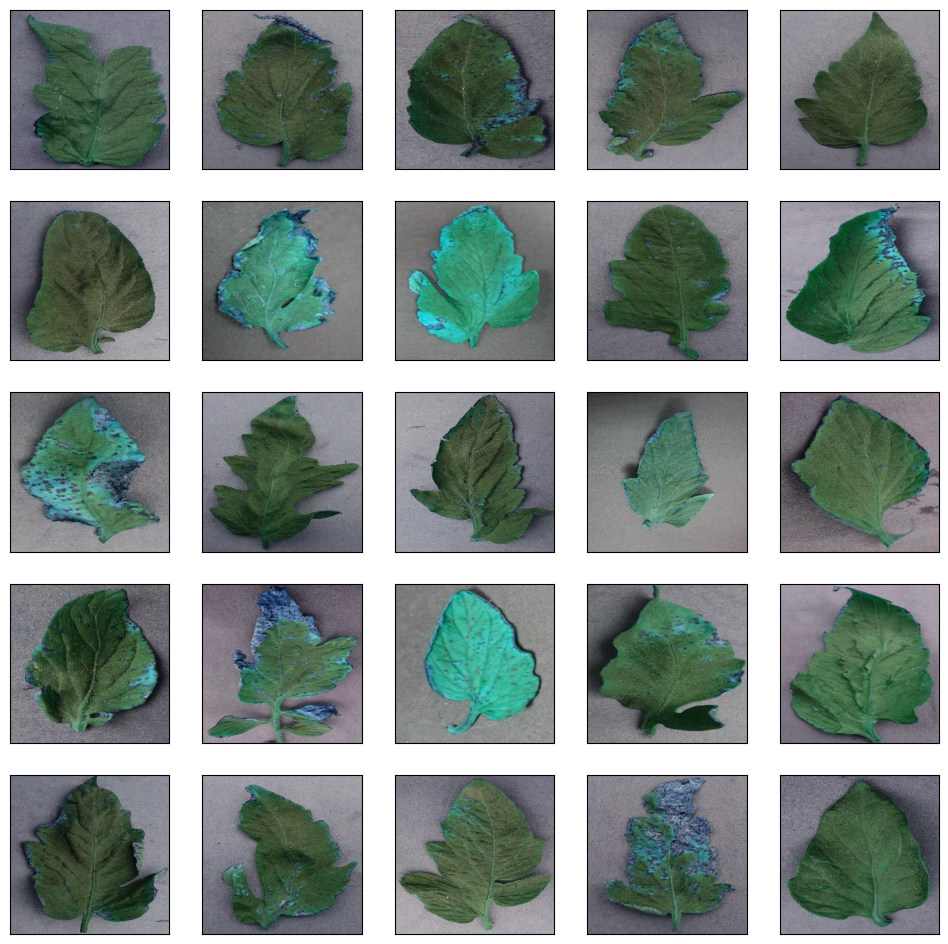

In [16]:
def disease_type(disease_type, rows, cols):
    fig,ax = plt.subplots(rows, cols, figsize=(12,12))
    disease_type = train['File'][train['Disease Type'] == disease_type].values
    n = 0
    for i in range(rows):
        for j in range(cols):
            image_path = os.path.join(data_dir, disease_type[n])
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].imshow(cv2.imread(image_path))
            n += 1
# Displays first n images of class from training set
disease_type('Tomato___Bacterial_spot', 5, 5)

**Let's look at some healthy samples**

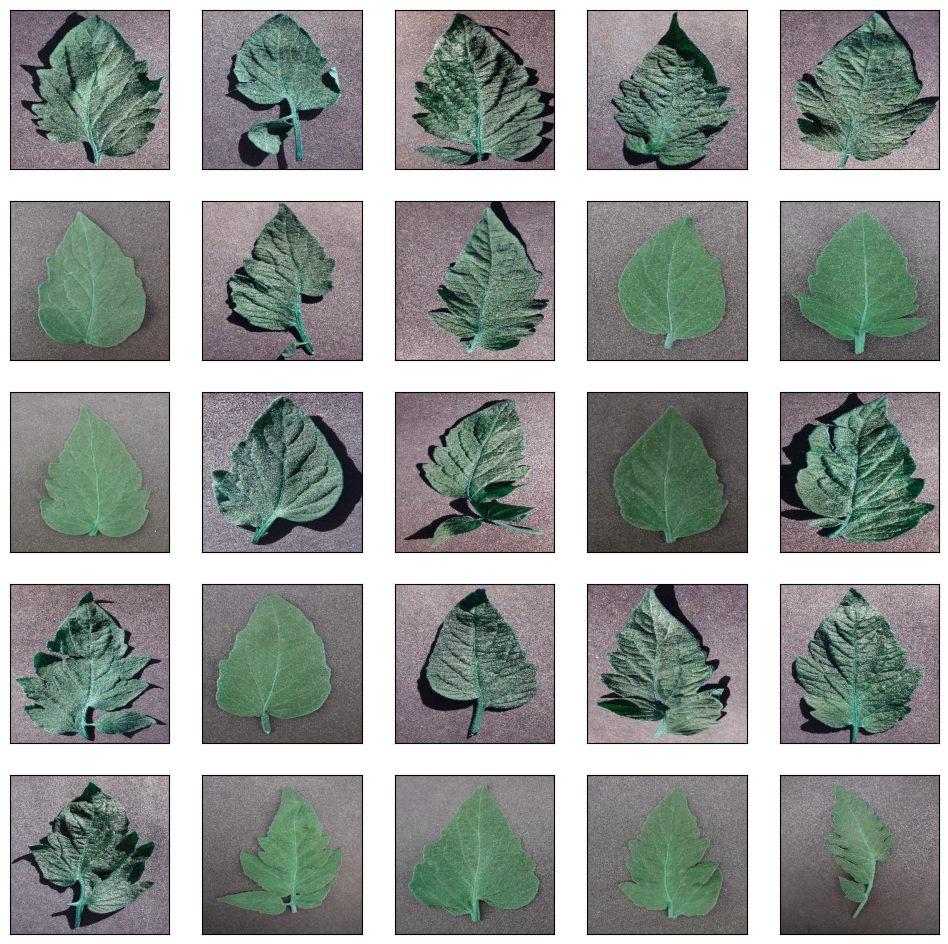

In [17]:
disease_type('Tomato___healthy', 5, 5)

## Image Data Augmentation

In [18]:
def create_image_data_generators(data_dir, image_size, batch_size, do_data_augmentation):
    # Inputs are suitably resized for the selected module.
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

    # Validation generator
    validation_generator = datagen.flow_from_directory(
        data_dir,
        shuffle=False,
        seed=42,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_size,
        batch_size=batch_size)

    if do_data_augmentation:
        # Enable data augmentation
        train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
            rescale=1./255,
            rotation_range=40,
            horizontal_flip=True,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            fill_mode='nearest')
    else:
        # Disable data augmentation
        train_datagen = datagen

    # Train generator
    train_generator = datagen.flow_from_directory(
        train_dir,
        subset="training",
        shuffle=True,
        seed=42,
        color_mode="rgb",
        class_mode="categorical",
        target_size=image_size,
        batch_size=batch_size)

    return train_generator, validation_generator

In [19]:
data_dir = data_dir
train_dir = train_dir
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
do_data_augmentation = True
train_generator, validation_generator = create_image_data_generators(data_dir, IMAGE_SIZE, BATCH_SIZE, do_data_augmentation)

Found 32086 images belonging to 25 classes.
Found 25677 images belonging to 25 classes.


# Build Model

## Create Callbacks for easy maintenance while training

In [20]:
class MyCallback(keras.callbacks.Callback):
    def __init__(self, model, patience, stop_patience, threshold, factor, batches, epochs, ask_epoch):
        super(MyCallback, self).__init__()
        self.model = model
        self.patience = patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience = stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold = threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor = factor # factor by which to reduce the learning rate
        self.batches = batches # number of training batch to run per epoch
        self.epochs = epochs
        self.ask_epoch = ask_epoch
        self.ask_epoch_initial = ask_epoch # save this value to restore if restarting training

        # callback variables
        self.count = 0 # how many times lr has been reduced without improvement
        self.stop_count = 0
        self.best_epoch = 1   # epoch with the lowest loss
        self.initial_lr = float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initial learning rate and save it
        self.highest_tracc = 0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss = np.inf # set lowest validation loss to infinity initially
        self.best_weights = self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights = self.model.get_weights()   # save initial weights if they have to get restored

    # Define a function that will run when train begins
    def on_train_begin(self, logs= None):
        msg = 'Do you want model asks you to halt the training [y/n] ?'
        print(msg)
        ans = input('')
        if ans in ['Y', 'y']:
            self.ask_permission = 1
        elif ans in ['N', 'n']:
            self.ask_permission = 0

        msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print(msg)
        self.start_time = time.time()


    def on_train_end(self, logs= None):
        stop_time = time.time()
        tr_duration = stop_time - self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print(msg)

        # set the weights of the model to the best weights
        self.model.set_weights(self.best_weights)


    def on_train_batch_end(self, batch, logs= None):
        # get batch accuracy and loss
        acc = logs.get('accuracy') * 100
        loss = logs.get('loss')

        # prints over on the same line to show running batch count
        msg = '{0:20s}processing batch {1:} of {2:5s}-   accuracy=  {3:5.3f}   -   loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end= '')


    def on_epoch_begin(self, epoch, logs= None):
        self.ep_start = time.time()


    # Define method runs on the end of each epoch
    def on_epoch_end(self, epoch, logs= None):
        ep_end = time.time()
        duration = ep_end - self.ep_start

        lr = float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr = lr
        acc = logs.get('accuracy')  # get training accuracy
        v_acc = logs.get('val_accuracy')  # get validation accuracy
        loss = logs.get('loss')  # get training loss for this epoch
        v_loss = logs.get('val_loss')  # get the validation loss for this epoch

        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor = 'accuracy'
            if epoch == 0:
                pimprov = 0.0
            else:
                pimprov = (acc - self.highest_tracc ) * 100 / self.highest_tracc # define improvement of model progres

            if acc > self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc = acc # set new highest training accuracy
                self.best_weights = self.model.get_weights() # training accuracy improved so save the weights
                self.count = 0 # set count to 0 since training accuracy improved
                self.stop_count = 0 # set stop counter to 0
                if v_loss < self.lowest_vloss:
                    self.lowest_vloss = v_loss
                self.best_epoch = epoch + 1  # set the value of best epoch for this epoch

            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count >= self.patience - 1: # lr should be adjusted
                    lr = lr * self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count = 0 # reset the count to 0
                    self.stop_count = self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count = 0 # reset counter
                    if v_loss < self.lowest_vloss:
                        self.lowest_vloss = v_loss
                else:
                    self.count = self.count + 1 # increment patience counter

        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor = 'val_loss'
            if epoch == 0:
                pimprov = 0.0

            else:
                pimprov = (self.lowest_vloss - v_loss ) * 100 / self.lowest_vloss

            if v_loss < self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss = v_loss # replace lowest validation loss with new validation loss
                self.best_weights = self.model.get_weights() # validation loss improved so save the weights
                self.count = 0 # reset count since validation loss improved
                self.stop_count = 0
                self.best_epoch = epoch + 1 # set the value of the best epoch to this epoch

            else: # validation loss did not improve
                if self.count >= self.patience - 1: # need to adjust lr
                    lr = lr * self.factor # adjust the learning rate
                    self.stop_count = self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count = 0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer

                else:
                    self.count = self.count + 1 # increment the patience counter

                if acc > self.highest_tracc:
                    self.highest_tracc = acc

        msg = f'{str(epoch + 1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc * 100:^9.3f}{v_loss:^9.5f}{v_acc * 100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print(msg)

        if self.stop_count > self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg = f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print(msg)
            self.model.stop_training = True # stop training

        else:
            if self.ask_epoch != None and self.ask_permission != 0:
                if epoch + 1 >= self.ask_epoch:
                    msg = 'enter H to halt training or an integer for number of epochs to run then ask again'
                    print(msg)

                    ans = input('')
                    if ans == 'H' or ans == 'h':
                        msg = f'training has been halted at epoch {epoch + 1} due to user input'
                        print(msg)
                        self.model.stop_training = True # stop training

                    else:
                        try:
                            ans = int(ans)
                            self.ask_epoch += ans
                            msg = f' training will continue until epoch {str(self.ask_epoch)}'
                            print(msg)
                            msg = '{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy', 'V_loss', 'V_acc', 'LR', 'Next LR', 'Monitor', '% Improv', 'Duration')
                            print(msg)

                        except Exception:
                            print('Invalid')

## Create custom plot

In [21]:
def plot_training(hist):
    '''
    This function take training model and plot history of accuracy and losses with the best epoch in both of them.
    '''

    # Define needed variables
    tr_acc = hist.history['accuracy']
    tr_loss = hist.history['loss']
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']

    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]

    Epochs = [i+1 for i in range(len(tr_acc))]

    loss_label = f'best epoch= {str(index_loss + 1)}'
    acc_label = f'best epoch= {str(index_acc + 1)}'

    # Plot training history
    plt.figure(figsize= (20, 8))
    plt.style.use('fivethirtyeight')

    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
    plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
    plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout
    plt.show()


## Create the model layers

In [22]:
class_count = train_generator.num_classes
print(class_count)
print("Building custom CNN model")

model = tf.keras.Sequential([
    # First block of Conv2D + MaxPooling
    Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SIZE + (3,)),
    BatchNormalization(),  # Add batch normalization to stabilize learning
    MaxPooling2D(2, 2),

    # Second block of Conv2D + MaxPooling
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Third block of Conv2D + MaxPooling
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Fourth block of Conv2D + MaxPooling
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    # Flatten the 2D output to 1D for the dense layers
    Flatten(),

    # Dense layers
    Dense(512, kernel_regularizer=regularizers.l2(0.016), activation='relu'),
    Dropout(rate=0.5, seed=123),

    Dense(256, kernel_regularizer=regularizers.l2(0.016), activation='relu'),
    Dropout(rate=0.5, seed=123),

    # Output layer (softmax)
    Dense(class_count, activation='softmax')
])

model.summary()


25
Building custom CNN model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                           

# Specifying Loss Functions

In [23]:
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

## Set all hyper parameter and variabel for custom training

In [24]:
batch_size = 40   # set batch size for training
epochs = 20   # number of all epochs in training
patience = 1   #number of epochs to wait to adjust lr if monitored value does not improve
stop_patience = 3   # number of epochs to wait before stopping training if monitored value does not improve
threshold = 0.9   # if train accuracy is < threshold adjust monitor accuracy, else monitor validation loss
factor = 0.5   # factor to reduce lr by
ask_epoch = 5   # number of epochs to run before asking if you want to halt training
batches = int(np.ceil(12 / batch_size))    # number of training batch to run per epoch

callbacks = [MyCallback(model= model, patience= patience, stop_patience= stop_patience, threshold= threshold,
            factor= factor, batches= batches, epochs= epochs, ask_epoch= ask_epoch )]

## Start train the model

In [25]:
history = model.fit(x= train_generator, epochs= epochs, verbose= 0, callbacks= callbacks,
                    validation_data= validation_generator, validation_steps= validation_generator.samples // validation_generator.batch_size)

Do you want model asks you to halt the training [y/n] ?


 n


 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration


I0000 00:00:1728137351.566361     146 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 1 /20    15.093   36.983   7.34417  63.810   0.00100  0.00100  accuracy     0.00    114.21 
 2 /20     5.707   56.338   3.81114  77.988   0.00100  0.00100  accuracy    52.34    103.35 
 3 /20     3.577   70.966   2.97288  76.693   0.00100  0.00100  accuracy    25.96    108.61 
 4 /20     2.527   81.006   2.07244  86.536   0.00100  0.00100  accuracy    14.15    103.06 
 5 /20     1.805   87.892   1.41933  93.301   0.00100  0.00100  accuracy     8.50    115.48 
 6 /20     1.327   91.592   1.62526  79.959   0.00100  0.00050  val_loss    -14.51   103.15 
 7 /20     0.870   95.790   0.63563  98.718   0.00050  0.00050  val_loss    55.22    114.70 
 8 /20     0.626   96.740   0.50513  98.821   0.00050  0.00050  val_loss    20.53    103.38 
 9 /20     0.519   97.208   0.42563  99.124   0.00050  0.00050  val_loss    15.74    110.02 
10 /20     0.444   97.772   0.37525  99.102   0.00050  0.00050  val_loss    11.84    103.58 
11 /20     0.396   97.963   0.37854  98.038   0.00050  0.00025  val_lo

## Plot history using custom plot

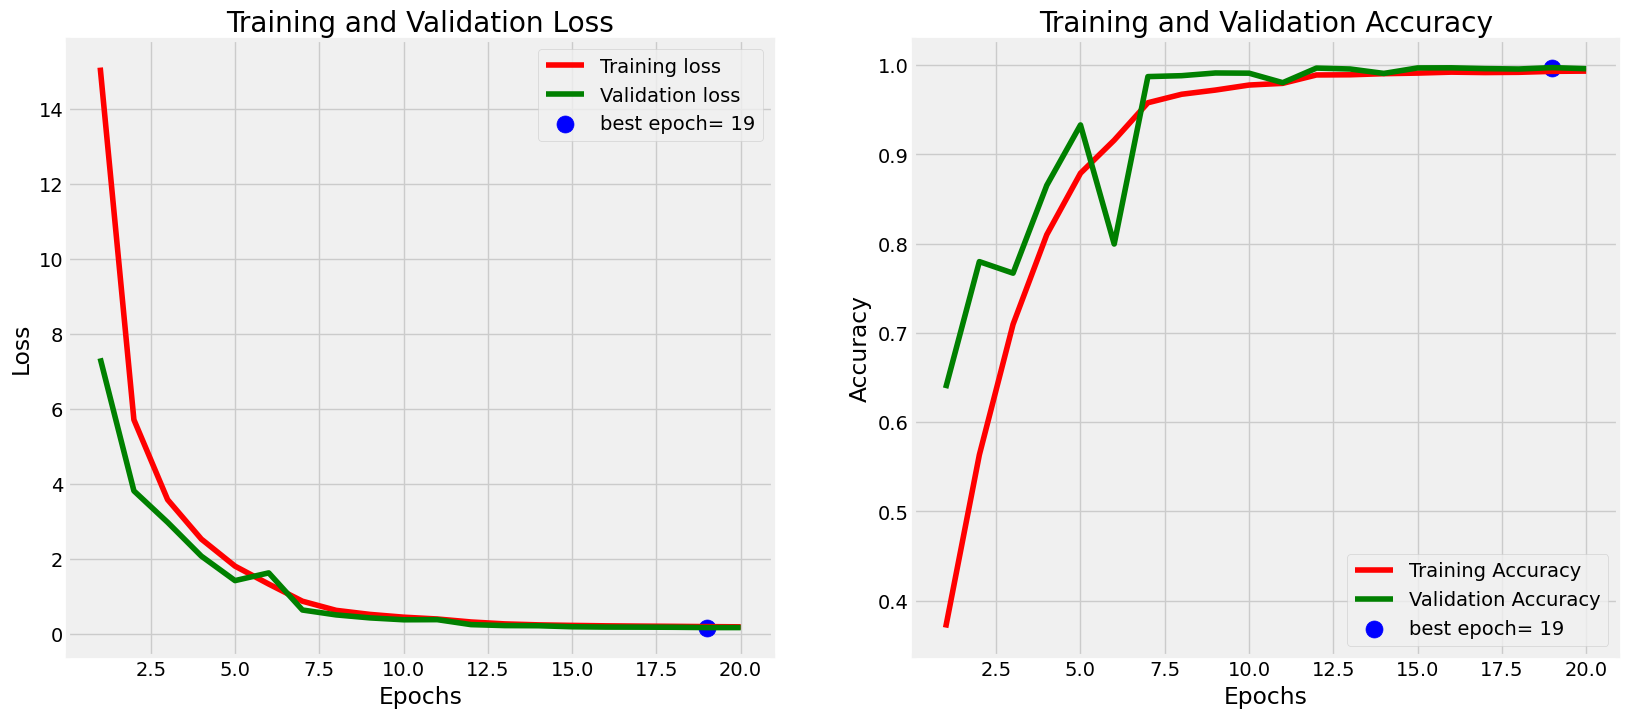

In [26]:
plot_training(history)

# Evaluation

## Evaluation using validation generator from dataset split

In [27]:
preds = model.predict(validation_generator, steps=5)
label = validation_generator.classes
pred = model.predict(validation_generator)

predicted_class_indices=np.argmax(pred,axis=1)

1003/1003 [==============================] - 50s 50ms/step


In [28]:
labels = (validation_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

## Confusion report

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cf_report = classification_report(predicted_class_indices,label)
cm = confusion_matrix(predicted_class_indices,label)

print(cf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       631
           1       1.00      1.00      1.00       621
           2       1.00      1.00      1.00       274
           3       1.00      0.99      1.00      1656
           4       1.00      1.00      1.00      1050
           5       1.00      1.00      1.00       854
           6       1.00      1.00      1.00      2292
           7       1.00      0.99      0.99       363
           8       0.99      1.00      1.00       989
           9       1.00      1.00      1.00      1481
          10       1.00      1.00      1.00       999
          11       0.99      0.99      0.99       998
          12       0.96      1.00      0.98       146
          13       1.00      1.00      1.00      1110
          14       1.00      1.00      1.00       456
          15       1.00      1.00      1.00      2132
          16       0.99      0.99      0.99       996
          17       1.00    

## Confusion matrix

Text(0.5, 160.08333333333326, 'Predicted')

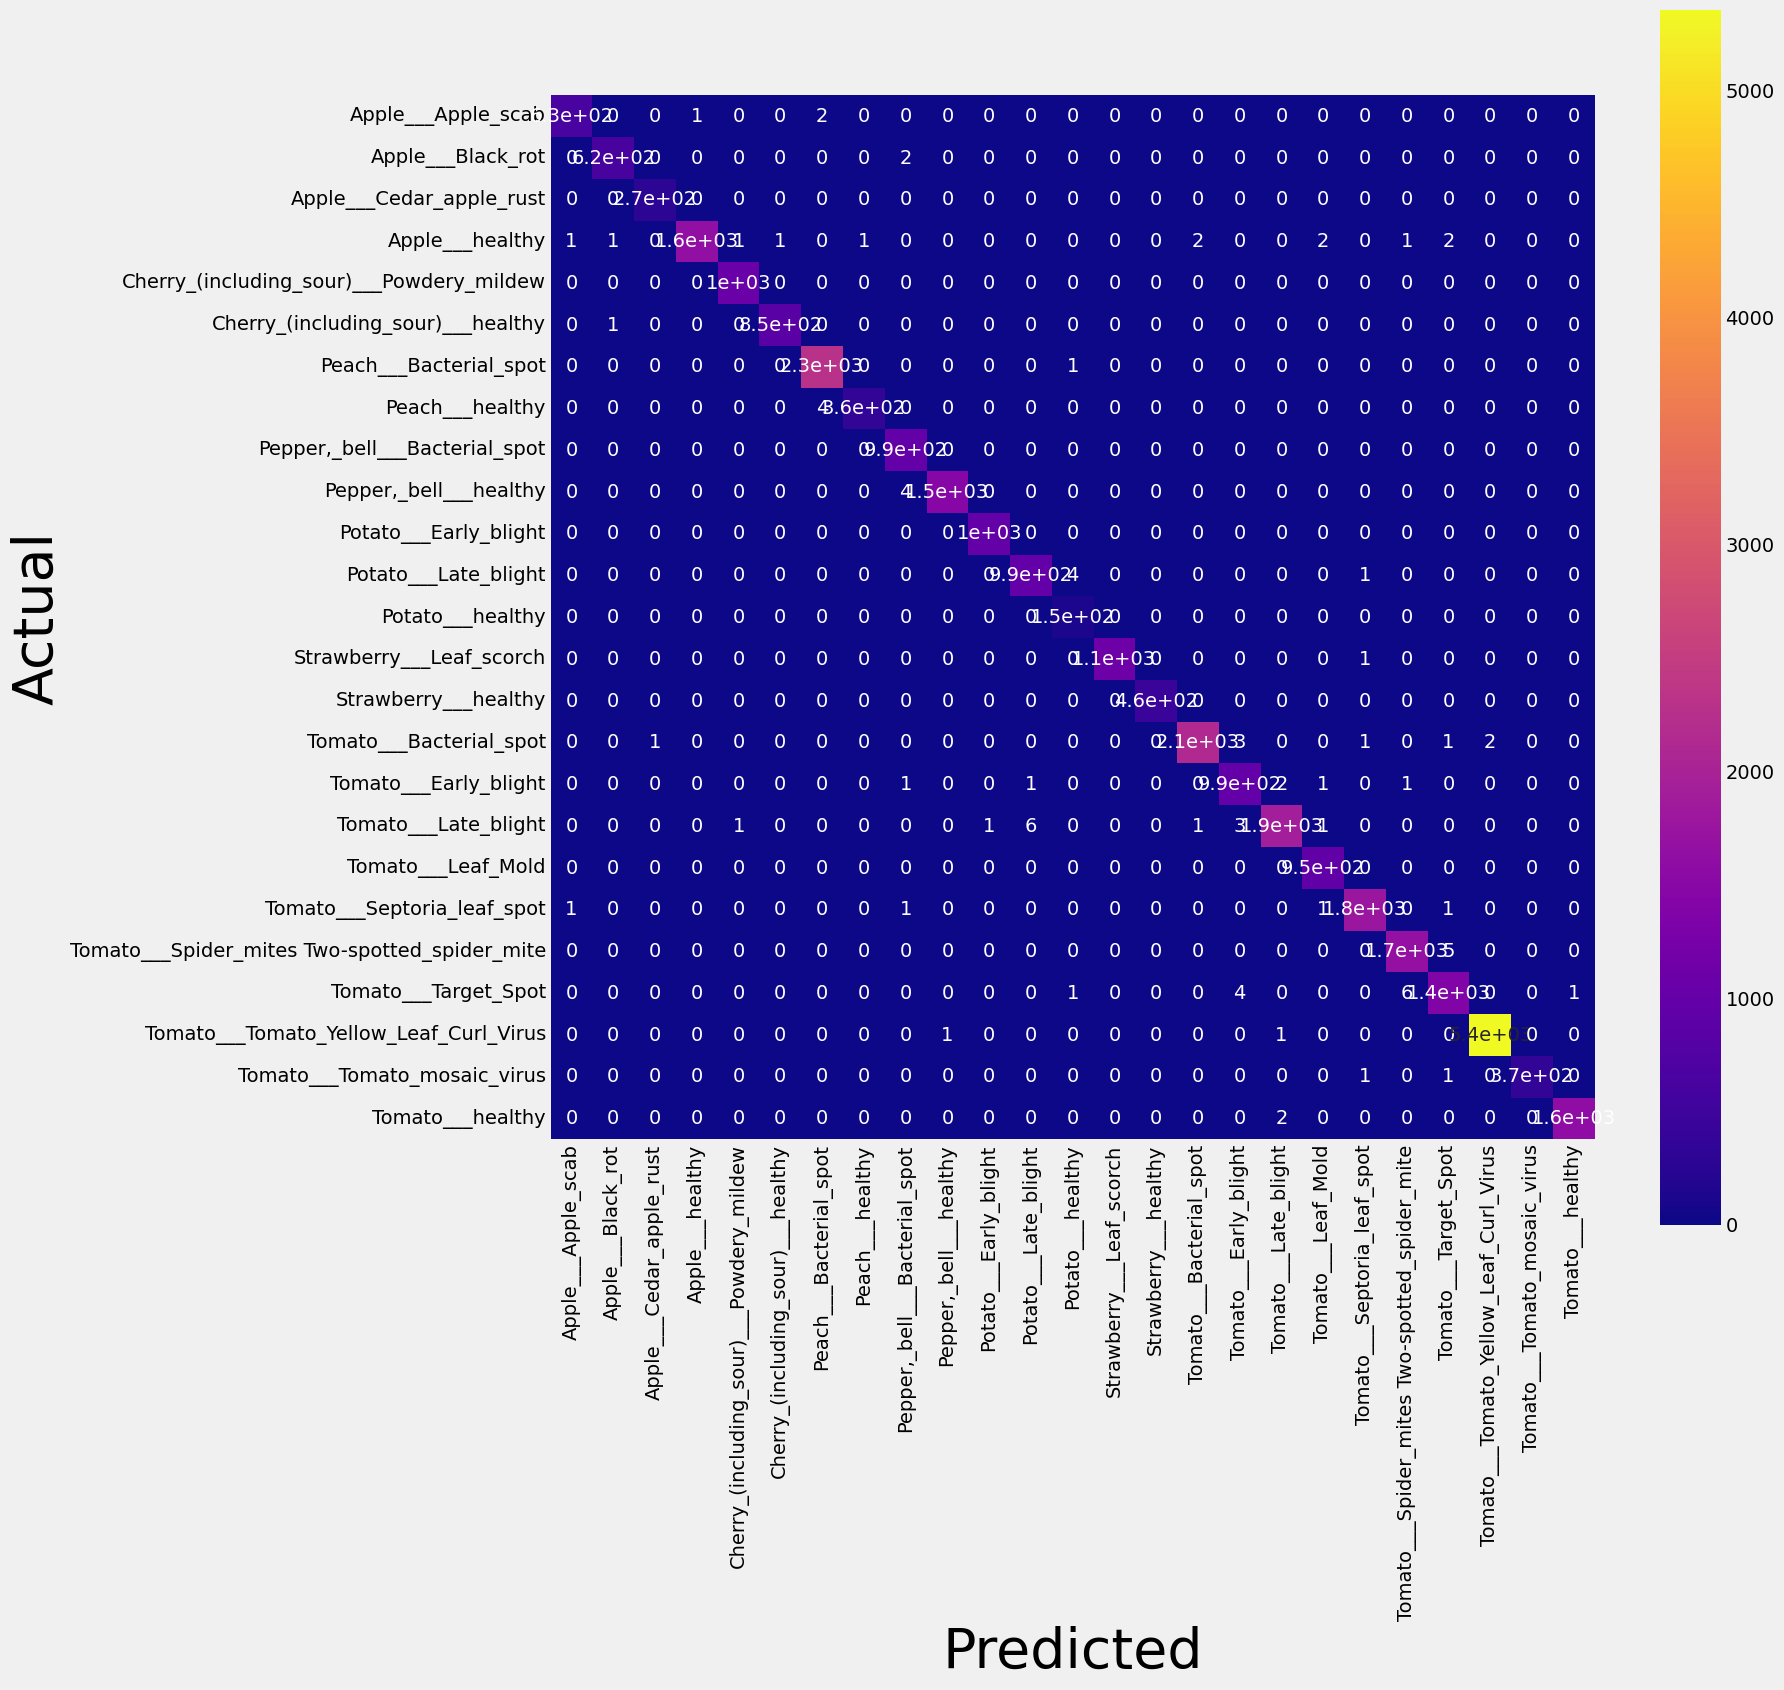

In [30]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, cmap=plt.cm.plasma, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)

ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

# Saving Model

In [31]:
import shutil
import tensorflow as tf

# Path to save the model
path = '/kaggle/working/model_fix'

# Save the model
tf.saved_model.save(model, path)

# Name for the ZIP file
zip_file_name = '/kaggle/working/model-fix'

# Create a ZIP file
shutil.make_archive(zip_file_name, 'zip', path)

# The model is now saved as a zip file in '/kaggle/working/'
# You can access and download this file from the Kaggle environment


'/kaggle/working/model-fix.zip'

# Testing

In [32]:
!git clone https://github.com/allanbil214/databases

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Cloning into 'databases'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 81 (delta 3), reused 15 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (81/81), 990.16 KiB | 7.44 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [34]:
# prompt: change this so it doesn't use url but get the image from /kaggle/working//databases/test randomly only 10

import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from PIL import Image

def load_image(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalisasi nilai piksel
    return img

def predict(image):
    probabilities = model.predict(np.asarray([image]))[0]
    class_idx = np.argmax(probabilities)
    return {disease_types[class_idx]: probabilities[class_idx]}

test_image_dir = '/kaggle/working/databases/test'  # Replace with the actual path to your test image directory
image_paths = [os.path.join(test_image_dir, filename) for filename in os.listdir(test_image_dir)]

# Prepare a list to store results
results = []

# Loop through all images in the directory
for filename in os.listdir(test_image_dir):
    if filename.endswith(('.JPG', '.jpeg', '.png')):  # Check for image files
      img_path = os.path.join(test_image_dir, filename)
      image = load_image(img_path)
      prediction = predict(image)
      print(f"Image: {filename}, Prediction: {prediction}")
      results.append({'filename': filename, 'prediction': prediction})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Save the DataFrame to a CSV file
results_csv_path = '/kaggle/working/predictions.csv'
results_df.to_csv(results_csv_path, index=False)

print("Predictions saved to:", results_csv_path)

1/1 [==============================] - 0s 487ms/step
Image: tomato early blight (1).JPG, Prediction: {'Tomato___Early_blight': 0.71538347}
1/1 [==============================] - 0s 21ms/step
Image: stroberi scorch (3).JPG, Prediction: {'Tomato___Early_blight': 0.73728085}
1/1 [==============================] - 0s 19ms/step
Image: pepper blackspot (3).JPG, Prediction: {'Tomato___Early_blight': 0.84201205}
1/1 [==============================] - 0s 19ms/step
Image: tomato septoria (1).JPG, Prediction: {'Tomato___Septoria_leaf_spot': 0.42281982}
1/1 [==============================] - 0s 19ms/step
Image: apple scab (2).JPG, Prediction: {'Pepper,_bell___healthy': 0.97123486}
1/1 [==============================] - 0s 21ms/step
Image: potato early blight (3).JPG, Prediction: {'Tomato___Early_blight': 0.5933553}
1/1 [==============================] - 0s 20ms/step
Image: potato early blight (2).JPG, Prediction: {'Tomato___Early_blight': 0.76961344}
1/1 [==============================] - 0s 19ms/

# The End